In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
mpl.style.use('ggplot')

Import CSV file


In [69]:
df = pd.read_csv("Dataset.csv")

FileNotFoundError: File b'Dataset.csv' does not exist

In [21]:
df.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
197878,2016-03-28 20:40:12,Volkswagen_Polo_1.4_Black/Silver_Edition,privat,Angebot,5000.0,control,kleinwagen,2008.0,manuell,80.0,polo,125000.0,11.0,benzin,volkswagen,nein,2016-03-28 0:00:00,0.0,34637.0,2016-04-07 2:47:00
101477,2016-03-17 14:53:01,Citroen_C1_guenstig_wegen_Neuanschaffung_abzug...,privat,Angebot,2950.0,control,kleinwagen,2007.0,NaN,0.0,c1,150000.0,3.0,benzin,citroen,nein,2016-03-17 0:00:00,0.0,26125.0,2016-03-17 15:44:28
279116,2016-04-02 17:54:18,Ford_Focus_1.6_TDCi_DPF_Ambiente,privat,Angebot,3800.0,control,limousine,2006.0,manuell,109.0,focus,150000.0,11.0,diesel,ford,nein,2016-04-02 0:00:00,0.0,13595.0,2016-04-06 17:17:58
257059,2016-03-07 14:50:56,Ford_Fiesta_ohne_TÜV_und_Au,privat,Angebot,130.0,control,NaN,2000.0,manuell,0.0,fiesta,150000.0,6.0,NaN,ford,nein,2016-03-07 0:00:00,0.0,59846.0,2016-03-11 12:49:48
176670,2016-03-12 17:49:25,Renault_Clio_1.2_ECON,privat,Angebot,1550.0,test,kleinwagen,1999.0,manuell,58.0,clio,125000.0,4.0,benzin,renault,nein,2016-03-12 0:00:00,0.0,37671.0,2016-04-07 9:46:04


In [22]:
df.shape

(293472, 20)

In [24]:
# Let's first check no value

df.isna().values.any() # so there is no any value

True

In [28]:
print(df.seller.value_counts())

privat        293468
gewerblich         3
Name: seller, dtype: int64


In [29]:
df[df.seller != 'gewerblich']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 0:00:00,0.0,70435.0,2016-04-07 3:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 0:00:00,0.0,66954.0,2016-04-07 1:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 0:00:00,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 0:00:00,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 0:00:00,0.0,60437.0,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 0:00:00,0.0,33775.0,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000.0,8.0,benzin,peugeot,nein,2016-04-01 0:00:00,0.0,67112.0,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0.0,test,limousine,1980.0,manuell,50.0,andere,40000.0,7.0,benzin,volkswagen,nein,2016-03-21 0:00:00,0.0,19348.0,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500.0,control,bus,2014.0,manuell,125.0,c_max,30000.0,8.0,benzin,ford,NaN,2016-04-04 0:00:00,0.0,94505.0,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999.0,test,kleinwagen,1998.0,manuell,101.0,golf,150000.0,0.0,NaN,volkswagen,NaN,2016-03-17 0:00:00,0.0,27472.0,2016-03-31 17:17:06


In [30]:
df=df.drop('seller',axis=1)

Cleaning the Dataset

In [31]:
print(df.offerType.value_counts())

Angebot    293463
Gesuch          8
Name: offerType, dtype: int64


In [32]:
df[df.offerType != 'Gesuch']

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000.0,0.0,benzin,volkswagen,NaN,2016-03-24 0:00:00,0.0,70435.0,2016-04-07 3:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja,2016-03-24 0:00:00,0.0,66954.0,2016-04-07 1:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 0:00:00,0.0,90480.0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein,2016-03-17 0:00:00,0.0,91074.0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein,2016-03-31 0:00:00,0.0,60437.0,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja,2016-04-04 0:00:00,0.0,33775.0,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,Angebot,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000.0,8.0,benzin,peugeot,nein,2016-04-01 0:00:00,0.0,67112.0,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,Angebot,0.0,test,limousine,1980.0,manuell,50.0,andere,40000.0,7.0,benzin,volkswagen,nein,2016-03-21 0:00:00,0.0,19348.0,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,Angebot,14500.0,control,bus,2014.0,manuell,125.0,c_max,30000.0,8.0,benzin,ford,NaN,2016-04-04 0:00:00,0.0,94505.0,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,Angebot,999.0,test,kleinwagen,1998.0,manuell,101.0,golf,150000.0,0.0,NaN,volkswagen,NaN,2016-03-17 0:00:00,0.0,27472.0,2016-03-31 17:17:06


In [33]:
df=df.drop('offerType',axis=1)

In [34]:
print(df.shape)

(293472, 18)


In [35]:
df=df[(df.powerPS > 50) & (df.powerPS < 900)]

In [36]:
print(df.shape)

(252612, 18)


In [37]:
df = df[(df.yearOfRegistration >= 1950) & (df.yearOfRegistration < 2017)]

In [38]:
print(df.shape)

(244292, 18)


In [39]:
df.drop(['name', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen',
         'postalCode','dateCreated'], axis='columns',inplace=True)

In [40]:
new_df = df.copy()

In [41]:
new_df = new_df.drop_duplicates ([ 'price', 'vehicleType', 'yearOfRegistration'
                                  ,'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType'
                                  ,'notRepairedDamage'])

In [42]:
new_df.gearbox.replace(('manuell', 'automatik'), ('manual', 'automatic'), inplace=True)

In [43]:
new_df.fuelType.replace(('benzin', 'andere', 'elektro'), ('petrol', 'others', 'electric'), inplace=True)

In [44]:
new_df.vehicleType.replace(('kleinwagen', 'cabrio', 'kombi', 'andere'), 
                           ('small car', 'convertible', 'combination', 'others'), inplace=True)

In [45]:
new_df.notRepairedDamage.replace(('ja', 'nein'), ('Yes', 'No'),inplace=True)

In [46]:
new_df = new_df[(new_df.price >= 100) & (new_df.price <= 150000)]

In [47]:
new_df['notRepairedDamage'].fillna(value='not-declared', inplace=True)

In [48]:
new_df[ 'fuelType'].fillna(value='not-declared', inplace=True)

In [49]:
new_df[ 'gearbox'].fillna(value='not-declared', inplace=True)

In [50]:
new_df[ 'vehicleType'].fillna (value='not-declared', inplace=True)

In [51]:
new_df['model'].fillna(value='not-declared',inplace=True)

In [57]:
new_df.to_csv("auto_preprocessed.csv")

In [58]:
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

In [66]:
mapper = {}
for i in labels:
    mapper[i]=LabelEncoder()
    mapper[i].fit(new_df[i])
    tr = mapper[i].transform(new_df[i])
    np.save(str('classes'+i+ '.npy'), mapper[i].classes_)
    print(i, ":",mapper[i])
    new_df.loc[:, i + '_labels'] = pd.Series (tr, index=new_df.index)

gearbox : LabelEncoder()
notRepairedDamage : LabelEncoder()
model : LabelEncoder()
brand : LabelEncoder()
fuelType : LabelEncoder()
vehicleType : LabelEncoder()


In [67]:
labeled=new_df[ ['price'
                 ,'yearOfRegistration'
                 ,'powerPS'
                 ,'kilometer'
                 ,'monthOfRegistration'
                ]
               + [x+"_labels" for x in labels]]

In [68]:
print(labeled.columns)

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244292 entries, 1 to 293470
Data columns (total 11 columns):
price                  244292 non-null float64
vehicleType            235194 non-null object
yearOfRegistration     244292 non-null float64
gearbox                240148 non-null object
powerPS                244292 non-null float64
model                  234943 non-null object
kilometer              244292 non-null float64
monthOfRegistration    244292 non-null float64
fuelType               231625 non-null object
brand                  244292 non-null object
notRepairedDamage      209934 non-null object
dtypes: float64(5), object(6)
memory usage: 22.4+ MB


backup=df.copy()

In [88]:
df=df.reset_index(drop=True)

In [89]:
df

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,18300.0,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja
1,9800.0,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN
2,1500.0,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein
3,3600.0,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein
4,650.0,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja
5,2200.0,cabrio,2004.0,manuell,109.0,2_reihe,150000.0,8.0,benzin,peugeot,nein
6,14500.0,bus,2014.0,manuell,125.0,c_max,30000.0,8.0,benzin,ford,NaN
7,999.0,kleinwagen,1998.0,manuell,101.0,golf,150000.0,0.0,NaN,volkswagen,NaN
8,2000.0,limousine,2004.0,manuell,105.0,3_reihe,150000.0,12.0,benzin,mazda,nein
9,2799.0,kombi,2005.0,manuell,140.0,passat,150000.0,12.0,diesel,volkswagen,ja


In [90]:
df.to_csv('Cleaned_datasets.csv')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244292 entries, 0 to 244291
Data columns (total 11 columns):
price                  244292 non-null float64
vehicleType            235194 non-null object
yearOfRegistration     244292 non-null float64
gearbox                240148 non-null object
powerPS                244292 non-null float64
model                  234943 non-null object
kilometer              244292 non-null float64
monthOfRegistration    244292 non-null float64
fuelType               231625 non-null object
brand                  244292 non-null object
notRepairedDamage      209934 non-null object
dtypes: float64(5), object(6)
memory usage: 20.5+ MB


In [92]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,2.442920e+05,244292.000000,244292.000000,244292.000000,244292.000000
mean,1.845103e+04,2003.327207,129.167091,125424.164524,5.991461
std,4.374433e+06,6.612873,61.839589,39407.626291,3.580350
min,0.000000e+00,1950.000000,51.000000,5000.000000,0.000000
25%,1.400000e+03,1999.000000,86.000000,100000.000000,3.000000
50%,3.500000e+03,2004.000000,116.000000,150000.000000,6.000000
75%,8.000000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,2016.000000,888.000000,150000.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CBEE860400>,
      dtype=object)

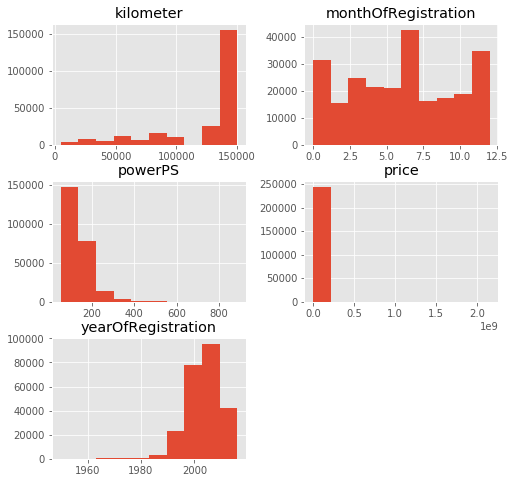

In [96]:
df.hist(figsize=(8,8))

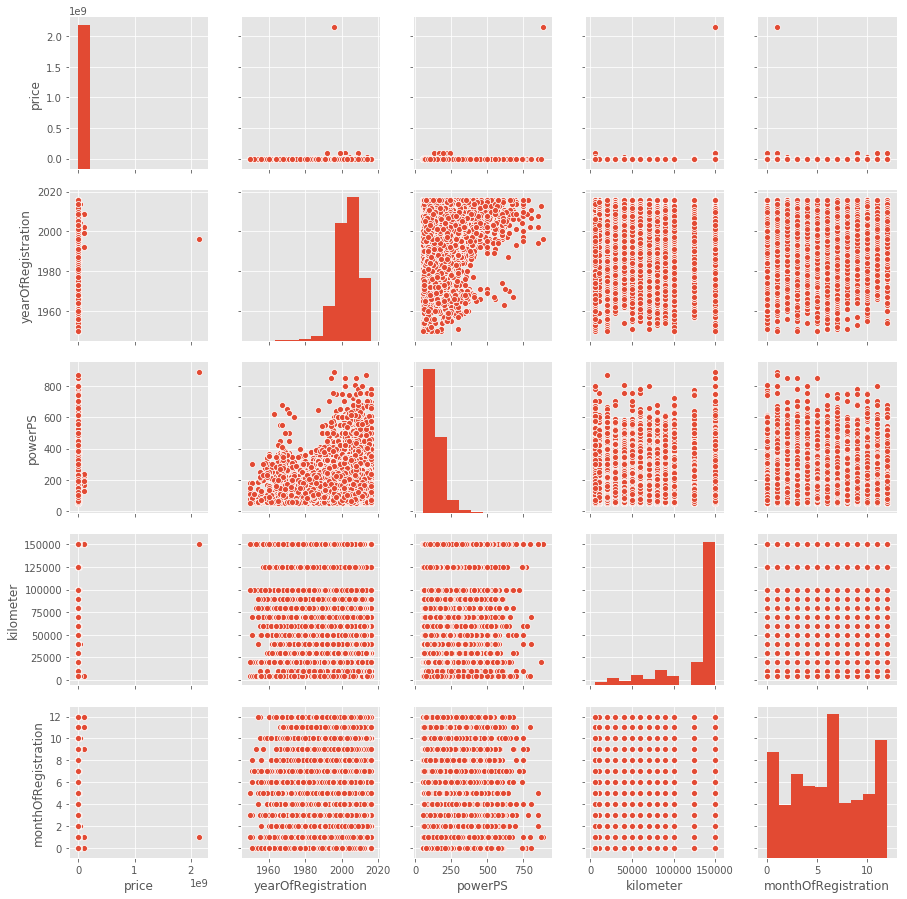

In [99]:
sns.pairplot(df)

In [107]:
le=LabelEncoder()

In [108]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,18300.0,coupe,2011.0,manuell,190.0,NaN,125000.0,5.0,diesel,audi,ja
1,9800.0,suv,2004.0,automatik,163.0,grand,125000.0,8.0,diesel,jeep,NaN
2,1500.0,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6.0,benzin,volkswagen,nein
3,3600.0,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7.0,diesel,skoda,nein
4,650.0,limousine,1995.0,manuell,102.0,3er,150000.0,10.0,benzin,bmw,ja


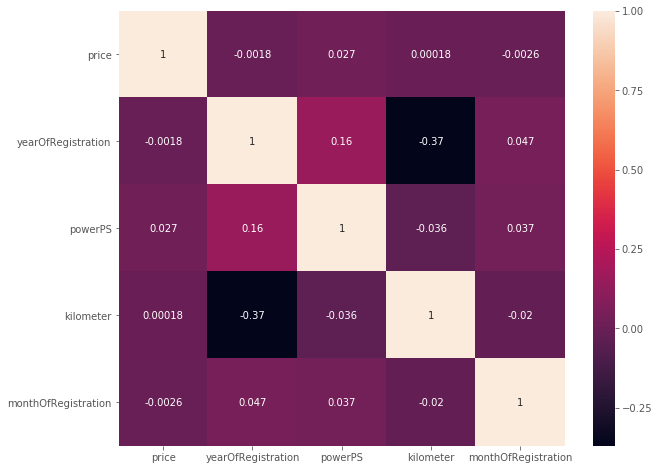

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

KeyError: "['Price'] not found in axis"